# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>**Description**: This dataset contains information about no-show data for medical appointments. Included in the dataset is approximately one-hundred thousand records with a granularity of one appointment for each row of data. Each appointment record has demographic information about the patient. The columns included in the dataset are: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.

### Question(s) for Analysis

>**Question**: Does a patient's age impact whether or not they no-show to their appointment? 

In [34]:
# Use this cell to set up import statements for all of the packages that you plan to use.
# Resubmit Update: Import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties
> **Data Wrangling Steps**: I will use the .head() function to return the first few rows of data in the dataset. The .info() method will help my review of the data to check for row count, null values, and data types that I'll be working with. 

In [35]:
# Load your data and print out a few lines. 

df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
# Displaying the size of the dataframe
# Display the data types and any missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
>**Data cleaning steps**: The dataset includes a field for Age which has no null values. I can use this field to determine which ages had the most no-show appointments. Since I will be checking the volumne of appointments that had a no-show, I would like there to be a unique row for each unique appointment. I will use the .duplicated() method to ensure there are unique Appointment IDs. 

>In order to identify whether age impacts patients not showing for their appointments, I will add a new column called AgeCategory that defines different age groups. We will also need the separate the No-show column into two separate datasets to easily gather the totals for the age groups that had a value of 'Yes' in the No-show column. 

In [37]:
# Check the dataset to ensure there aren't any duplicate appointments
sum(df.duplicated('AppointmentID'))

0

In [38]:
# Add a new column to the dataset called AgeCategory 
# Define different age ranges for each category in the new AgeCategory column

# Resubmit Update: Remove the following code
#def categorizedage(Age):
#    if Age < 18:
#        return '0-18'
#    elif Age >= 18 and Age < 40:
#        return '18-40'
#    elif Age >= 40 and Age < 60:
#        return '40-60'
#    elif Age >= 60:
#        return '60+'
#df['AgeCategory'] = df['Age'].apply(categorizedage)

# Resubmit Update: Use vectorized methods in your analysis
intervals=[0,19,39,59,79,df['Age'].max()]
labels=['0-20','20-40','40-60','60-80','80+']
df['Age_Category'] = pd.cut(df['Age'], intervals, labels=labels, include_lowest=True)

In [39]:
# Check the dataset to ensure the new column (AgeCategory) doesn't contain any null values. 
df.info();
df.head();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110527 non-null  float64 
 1   AppointmentID   110527 non-null  int64   
 2   Gender          110527 non-null  object  
 3   ScheduledDay    110527 non-null  object  
 4   AppointmentDay  110527 non-null  object  
 5   Age             110527 non-null  int64   
 6   Neighbourhood   110527 non-null  object  
 7   Scholarship     110527 non-null  int64   
 8   Hipertension    110527 non-null  int64   
 9   Diabetes        110527 non-null  int64   
 10  Alcoholism      110527 non-null  int64   
 11  Handcap         110527 non-null  int64   
 12  SMS_received    110527 non-null  int64   
 13  No-show         110527 non-null  object  
 14  Age_Category    110526 non-null  category
dtypes: category(1), float64(1), int64(8), object(5)
memory usage: 11.9+ MB


In [40]:
# Separate the No-show values into two datasets
# Patients who didn't show for their appointment will be in df_a
# Patients who did show for their appointment will be in df_b

df_a = df[df['No-show'] == 'Yes']
df_b = df[df['No-show'] == 'No']

<a id='eda'></a>
## Exploratory Data Analysis

> **Data Analysis**: I started my analysis with analyzing the total number of no-show appointments per age category. I used a bar graph to visually see the difference in volume by group. The outcome of this data made me wonder if the age category that had the most no-show appointments also had the most total appointments scheduled overall. I then created a horizontal bar graph to see the total volume of appointments by the same age group. Understanding the total volume was important to answering the correlation between age and no-show appointments. I decided to also include a histogram that displayed both appointment types (no-show = yes and no). Combining these gave the total volume and showed how many were no-show appointments. 

### Research Question 1: Does a patient's age impact whether or not they show up to their appointment?

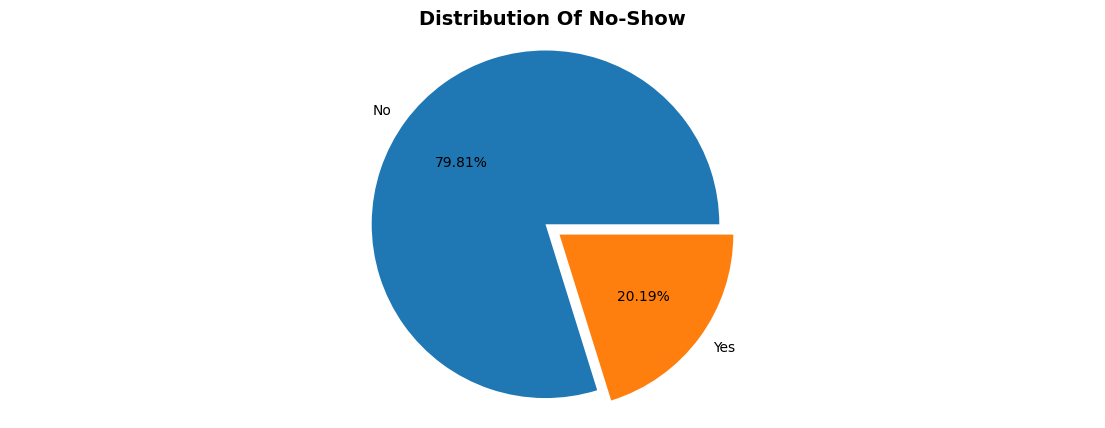

In [41]:
# Which age group had the most total appointments scheduled using a barh chart? 
# dfv = df['No-show'].value_counts()[:20].plot(kind='pie');
# Resubmit Update: Added a pie plot as a second to meet the 'two kinds of plots' requirement
# Resubmit Update: 1d variable

xVar='No-show'
# Pie chart of xVar
df[xVar].value_counts().plot(kind='pie',figsize=(14,5),explode=[0,0.1],autopct='%1.2f%%');
# Add title and format it
plt.title(f'Distribution of {xVar}'.title(), fontsize = 14, weight = "bold")
# Remove y label
plt.ylabel('');
# Center pie chart
plt.axis('equal');

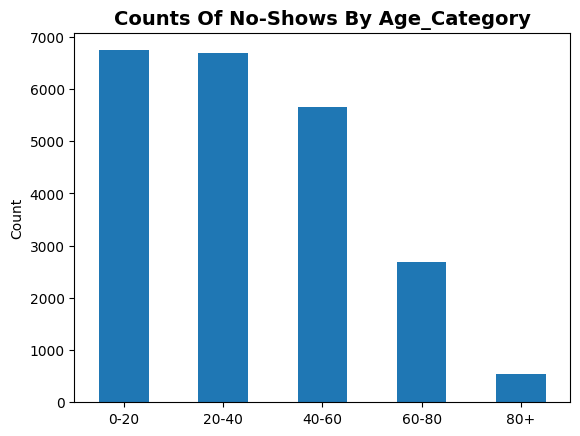

In [42]:
# Find the age category for those who didn't show up for their appointments the most
# Resubmit Update: Fixed the tick labels, added a title, and finished the code cell with a ;
# Resubmit Update: 2d variable
xVar='Age_Category'
dfa = df_a['Age_Category'].value_counts()[:20].plot(kind='bar',rot=0);
plt.title(f'Counts of No-shows by {xVars}'.title(), fontsize = 14, weight = "bold");
plt.ylabel('Count');

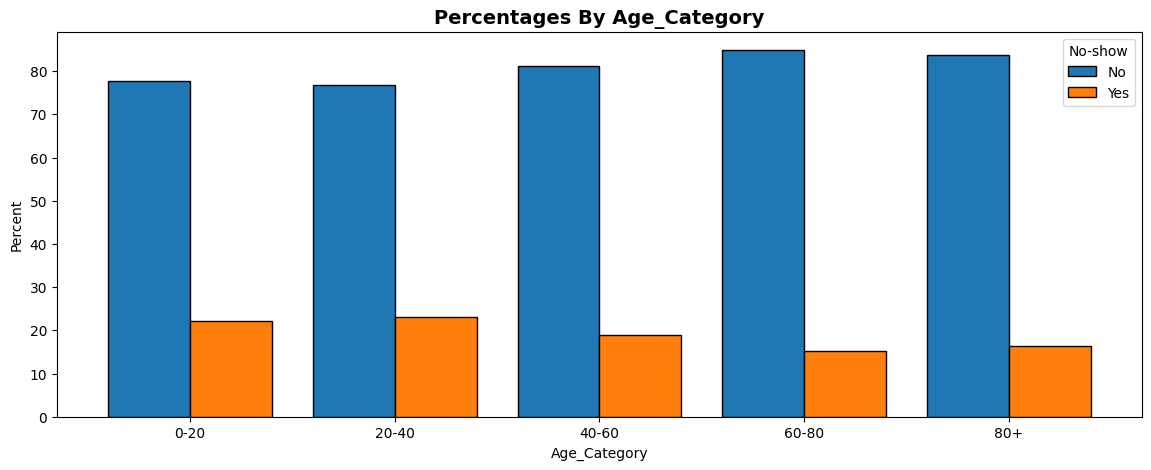

In [43]:
# Resubmit Update: Add graph that uses proportions/percentages 
xVar='Age_Category'
df.groupby(xVar)['No-show'].value_counts(normalize=True).mul(100).unstack().plot.bar(edgecolor='black',figsize=[14,5],rot=0,width=0.8);
plt.ylabel('Percent');
plt.title(f'Percentages by {xVars}'.title(), fontsize = 14, weight = "bold");

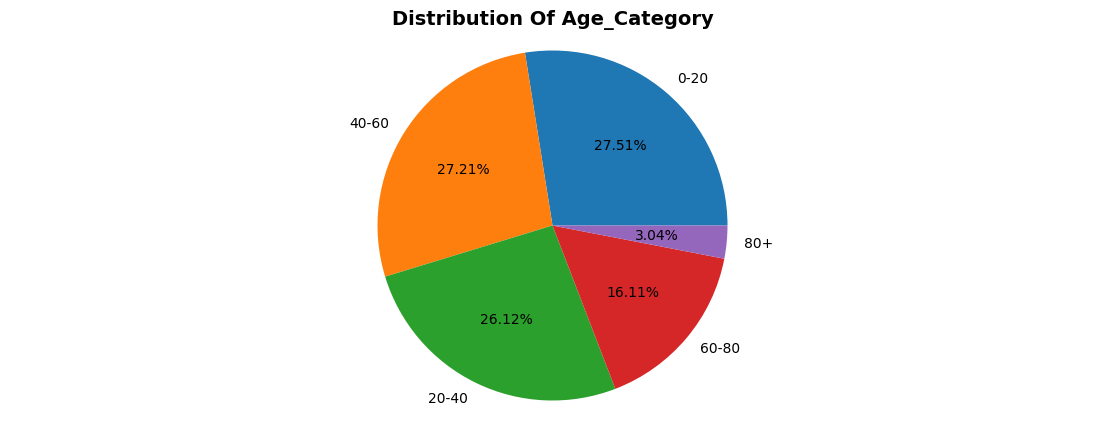

In [44]:
#dfv = df['Age_Category'].value_counts()[:20].plot(kind='pie');
# Resubmit Update: A second 2d variable

xVars='Age_Category'
#pie chart of xVar
df[xVars].value_counts().plot(kind='pie',figsize=(14,5),autopct='%1.2f%%');
#Add title and format it
plt.title(f'Distribution of {xVars}'.title(), fontsize = 14, weight = "bold")
#Remove y lable
plt.ylabel('');
# Center pie chart
plt.axis('equal');

<a id='conclusions'></a>
## Conclusions

>**Summary**: In conclusion, I found that age may actually play a factor in whether or not patients showed up for their appointments. Out lined below is my analysis of the question posed, it is important to note though, these findings are tentititive pending further statistical analysis. There are limitations in the dataset that should be considered during this analysis. The dataset only includes sample size, which may skew the results of the analysis. The dataset also doesn't show the patient's peferred language. Preferred language could help with determining whether language was a barrier for patients with incidents of no-shows. 

>In my analysis I found that adult patients who fell in the age range between 18-40 years had the most incidents of not showing up for their appointments. I was curious if this was due to that age range having many more appointments in general compared to the other age ranges. 

>I then checked to see the volume of total appointments scheduled for each age group. This further analysis showed that while patients in the 18-40 age range had the most appointments scheduled, the 40-60 age group had almost the same volume of appointments scheduled and with over a thousand less incidents of no-shows.

In [45]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 434760 bytes to Investigate_a_Dataset.html
